Completeness (Percentage of Non-Missing Values):
 name       88.888889
age        88.888889
salary     88.888889
city      100.000000
dtype: float64

Number of Duplicate Rows: 0

Invalid salary entries: 2

Data Types:
 name       object
age       float64
salary    float64
city       object
dtype: object

Data Quality Score: 66.67

Descriptive Statistics of Numeric Columns:
               age        salary
count    8.000000      7.000000
mean    52.125000  61142.857143
std     59.927188   7581.305328
min     25.000000  50000.000000
25%     28.750000  56500.000000
50%     30.000000  60000.000000
75%     36.250000  67500.000000
max    200.000000  70000.000000


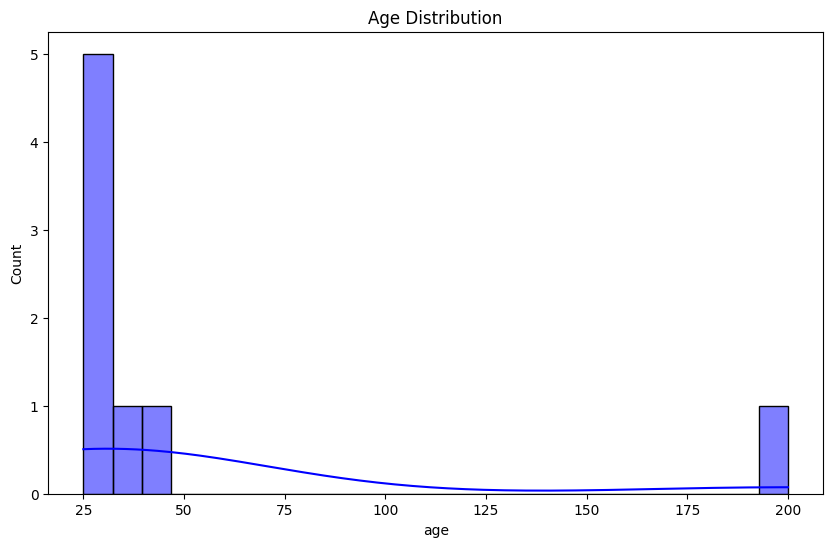

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Sample dataset
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', None, 'Frank', 'Grace', 'Alice'],
    'age': [25, 30, 35, 40, 28, np.nan, 29, 200, 30],  # Some unrealistic age values
    'salary': [50000, 55000, None, 58000, 'Unknown', 60000, 65000, 70000, 70000],  # Invalid salary
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'Chicago', 'Phoenix', 'Los Angeles']
}
df = pd.DataFrame(data)

# 1. Completeness: Calculate the percentage of non-missing values
def completeness(df):
    return df.notnull().mean() * 100

completeness_df = completeness(df)
print("Completeness (Percentage of Non-Missing Values):\n", completeness_df)

# 2. Consistency: Check for duplicates in the dataset
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# 3. Validity: Check for valid numeric values in 'salary' and 'age' (ensure 'salary' is numeric)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')  # Convert invalid 'salary' values to NaN
invalid_salary = df['salary'].isnull().sum()
print(f"\nInvalid salary entries: {invalid_salary}")

# 4. Data Types: Check if columns have appropriate data types
print("\nData Types:\n", df.dtypes)

# 5. Scoring system: Based on Completeness, Duplicates, and Invalid Values
def data_quality_score(df):
    completeness_score = df.notnull().mean().mean()  # Overall completeness score (mean of all columns)
    duplicates_penalty = df.duplicated().sum() / len(df)  # Duplicate penalty (proportion of duplicate rows)
    invalid_values_penalty = df['salary'].isnull().sum() / len(df)  # Invalid salary penalty

    # Score calculation
    score = (completeness_score - duplicates_penalty - invalid_values_penalty) * 100  # Normalize to 100 scale
    return score

# Get the overall data quality score
score = data_quality_score(df)
print(f"\nData Quality Score: {score:.2f}")

# 6. Descriptive statistics of numeric columns
print("\nDescriptive Statistics of Numeric Columns:\n", df.describe())

# 7. Histogram to visualize distributions (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()